In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Dealing with CV Data

In [16]:
data=pd.read_csv('/Users/prasantpoudel/Desktop/Resume_Matcher_With_JD/Data/Resume/Resume.csv')
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


<Axes: >

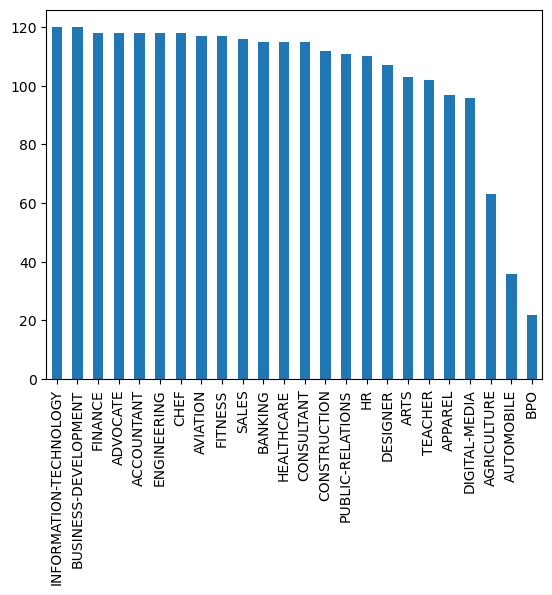

In [5]:
data['Category'].value_counts().plot(kind='bar')

In [34]:
data['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [60]:
import os
import PyPDF2
import re
import csv

BASE_DIR = './Data/data/'
output_csv_file = 'output.csv'
data_list=['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION']

def extract_pdf_names(folder_path):
    pdf_names = []
    # Iterate through files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            pdf_names.append(filename)

    return pdf_names

def extract_key_details_from_pdf(pdf_file_path):
    try:
        pdf_text = ""
        # Open the PDF file in binary read mode
        with open(pdf_file_path, 'rb') as pdf_file:
            # Create a PDF reader object
            pdf_reader = PyPDF2.PdfReader(pdf_file)

            # Iterate through each page in the PDF
            for page_num in range(len(pdf_reader.pages)):
                # Get the page
                page = pdf_reader.pages[page_num]

                # Extract text from the page
                page_text = page.extract_text()

                cleaned_text = re.sub(r'[^\w\s]', '', page_text)
                final_text = cleaned_text.replace('\n', ' ')
                final_text=re.sub(r'\s+', ' ', final_text)
                pdf_text+=final_text

            # Extract the CV Title
            first_page = pdf_reader.pages[0]
            first_page_text = first_page.extract_text()
            first_line = first_page_text.split('\n')[0]

            skills_match = re.search(r'Skills (.*?)(?=\n-|\Z)', pdf_text)
            if skills_match:
                skills = skills_match.group(1)
            else: 
                skills='N/A'
            education_match = re.search(r'Education(.*?)(?=Skills|$)', pdf_text)
            if education_match:
                education = education_match.group(1)
            else:
                education='N/A'

        return first_line, education, skills
    except Exception as e:
        return str(e), '', ''  # Return empty strings for education and skills if extraction fails

# Usage example
with open(output_csv_file, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Category','id','CV_Position', 'Education', 'Skills'])
    for i in data_list:
        file_name = BASE_DIR + i
        pdf_names = extract_pdf_names(file_name)

        for j in pdf_names:
            pdf_dir = BASE_DIR + i + '/' + j
            cv_folder = j
            id = os.path.splitext(cv_folder)[0]
            first_line, education, skills = extract_key_details_from_pdf(pdf_dir)
            csv_writer.writerow([i,id,first_line, education, skills])

print(f'Extracted information saved to {output_csv_file}')


Extracted information saved to output.csv


# Dealing with hugging face data

In [ ]:
# download dataset Use in Bash 
'''
curl -X GET \
     "https://datasets-server.huggingface.co/rows?dataset=jacob-hugging-face%2Fjob-descriptions&config=default&split=train&offset=0&limit=15"

'''
# change the limit more for more number of dataset


In [61]:
data=pd.read_csv('/Users/prasantpoudel/Desktop/Resume_Matcher_With_JD/Data/training_data.csv')


In [62]:
data.head()

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [72]:
df=data.head(15)
df

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."
5,DesignUps,designups is a nashville based design and inte...,Frontend Web Developer,892,"{\n ""Core Responsibilities"": ""Translate desi..."
6,"Equisolve, Inc.",about the position\n\nthe web designer is resp...,Remote Website Designer,3471,"{\n ""Core Responsibilities"": ""Provide design..."
7,Zander Insurance Agency,job description\n\nzander insurance group is o...,Web Designer,2896,"{\n ""Core Responsibilities"": ""Design compell..."
8,Tuff,tuff is a growth marketing team working with c...,Web Designer,5143,"{\n ""Core Responsibilities"": ""Work on variou..."
9,General Dynamics Information Technology,type of requisition regular\n\nclearance level...,SR. Web Designer,4023,"{\n ""Core Responsibilities"": ""Designs and bu..."


In [73]:
print(df['model_response'][0])

 {
  "Core Responsibilities": "Responsible for expanding Google Workspace product adoption across an assigned territory. Build relationships with customers to understand needs and provide Google Workspace solutions. Partner with account teams to construct solutions and grow business for Google Workspace.",
  "Required Skills": "Bachelor's degree or equivalent experience. Experience managing enterprise SaaS accounts and sales cycles.", 
  "Educational Requirements": "Bachelor's degree or equivalent experience.",
  "Experience Level": "Experience managing enterprise SaaS accounts and sales cycles.",
  "Preferred Qualifications": "Experience building strategic partnerships with enterprise customers. Ability to work through a reseller ecosystem. Excellent communication and strategic thinking skills.",
  "Compensation and Benefits": "N/A"
}


In [74]:
print(df['job_description'][0])

minimum qualifications
bachelors degree or equivalent practical experience years of experience in saas or productivity tools businessexperience managing enterprise accounts with sales cycles
preferred qualifications
 years of experience building strategic business partnerships with enterprise customersability to work through and with a reseller ecosystem to scale the businessability to plan pitch and execute a territory business strategyability to build relationships and to deliver results in a crossfunctionalmatrixed environmentability to identify crosspromoting and uppromoting opportunities within the existing account baseexcellent account management writtenverbal communication strategic and analyticalthinking skills
about the job
as a member of the google cloud team you inspire leading companies schools and government agencies to work smarter with google tools like google workspace search and chrome you advocate the innovative power of our products to make organizations more product

In [75]:
df.shape

(15, 5)